# Import Libraries

In [ ]:
!pip install gradio


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression,Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay




```

# Load Data

In [ ]:
df = pd.read_csv("data.csv",sep=";")
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


# Data Cleaning, Information & Visualization

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
df.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance\t,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


In [ ]:
df.shape

(4424, 37)

In [ ]:
df.size

163688

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [ ]:
df['Target'].value_counts()

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


In [ ]:
df['Target'] = LabelEncoder().fit_transform(df['Target'])

In [ ]:
df['Target'].value_counts()

,count
Target,
2,2209
0,1421
1,794


<ipython-input-15-ff5dcede28a6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Target'], color = "Blue")


<Axes: xlabel='Target', ylabel='Count'>

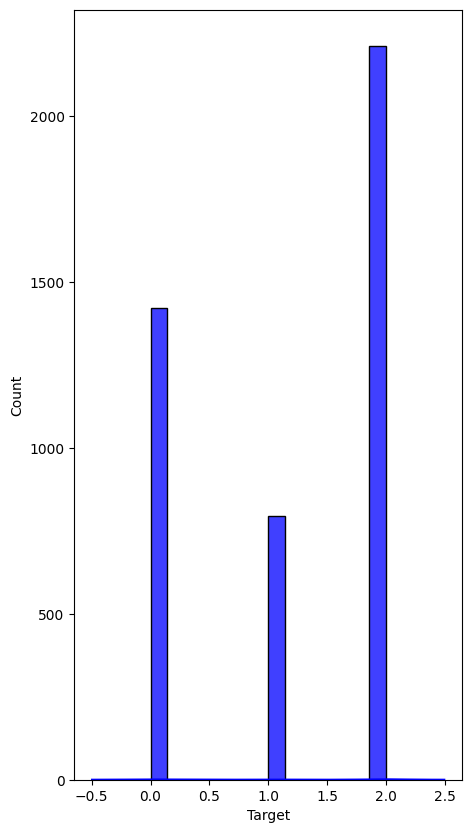

In [ ]:
plt.figure(figsize=(5, 10))
sns.histplot(df['Target'], color = "Blue")
sns.distplot(df['Target'], color = "Blue")

Text(0.5, 1.0, 'Target')

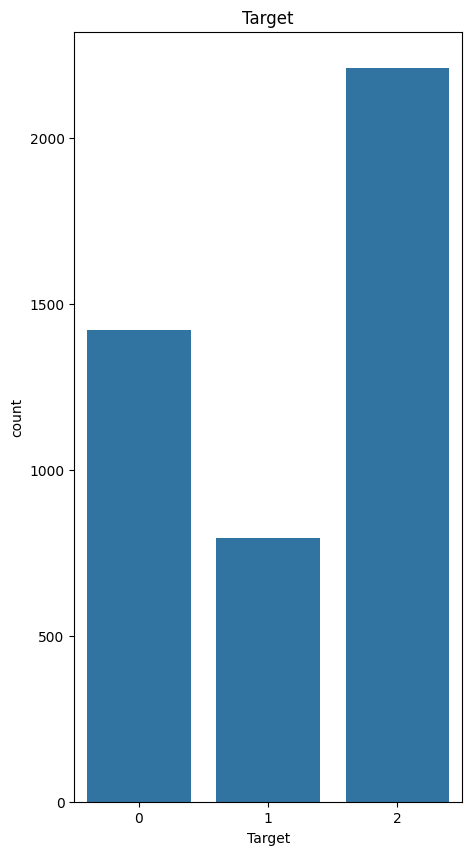

In [ ]:
plt.figure(figsize=(5, 10))
sns.countplot(data = df, x="Target").set_title('Target')

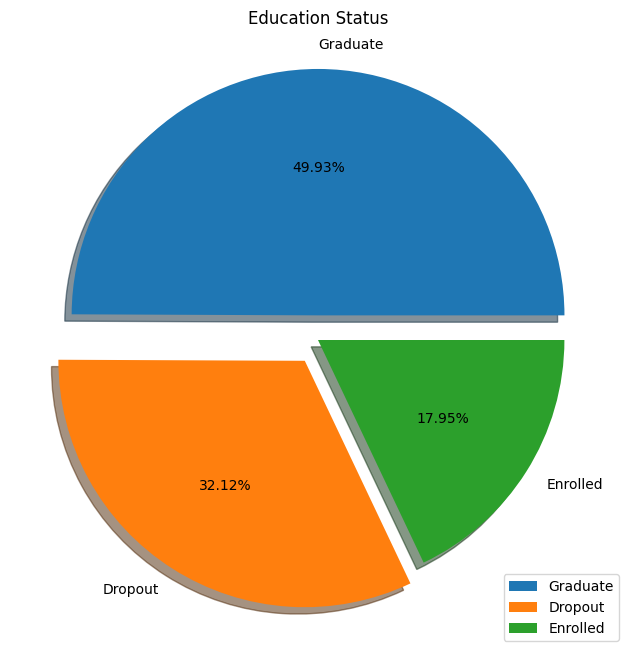

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Education Status")
plt.pie(df['Target'].value_counts(), labels = ['Graduate', 'Dropout', 'Enrolled'], explode = (0.1, 0.1, 0.0), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')

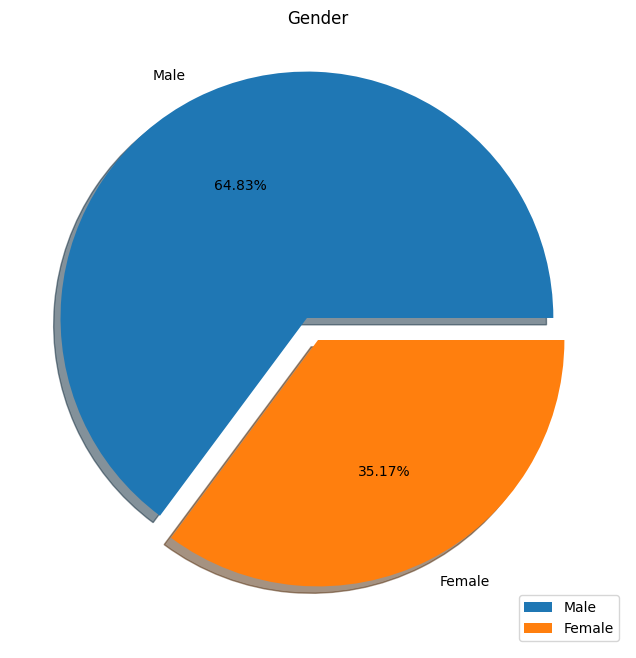

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Gender")
plt.pie(df['Gender'].value_counts(), labels = ['Male', 'Female'], explode = (0.1, 0.0), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')

<ipython-input-19-e4734a4c6b05>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.iloc[:, i], color='blue')
<ipython-input-19-e4734a4c6b05>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.iloc[:, i], color='blue')
<ipython-input-19-e4734a4c6b05>:5: UserWarning: 

`distplot` is a deprecated

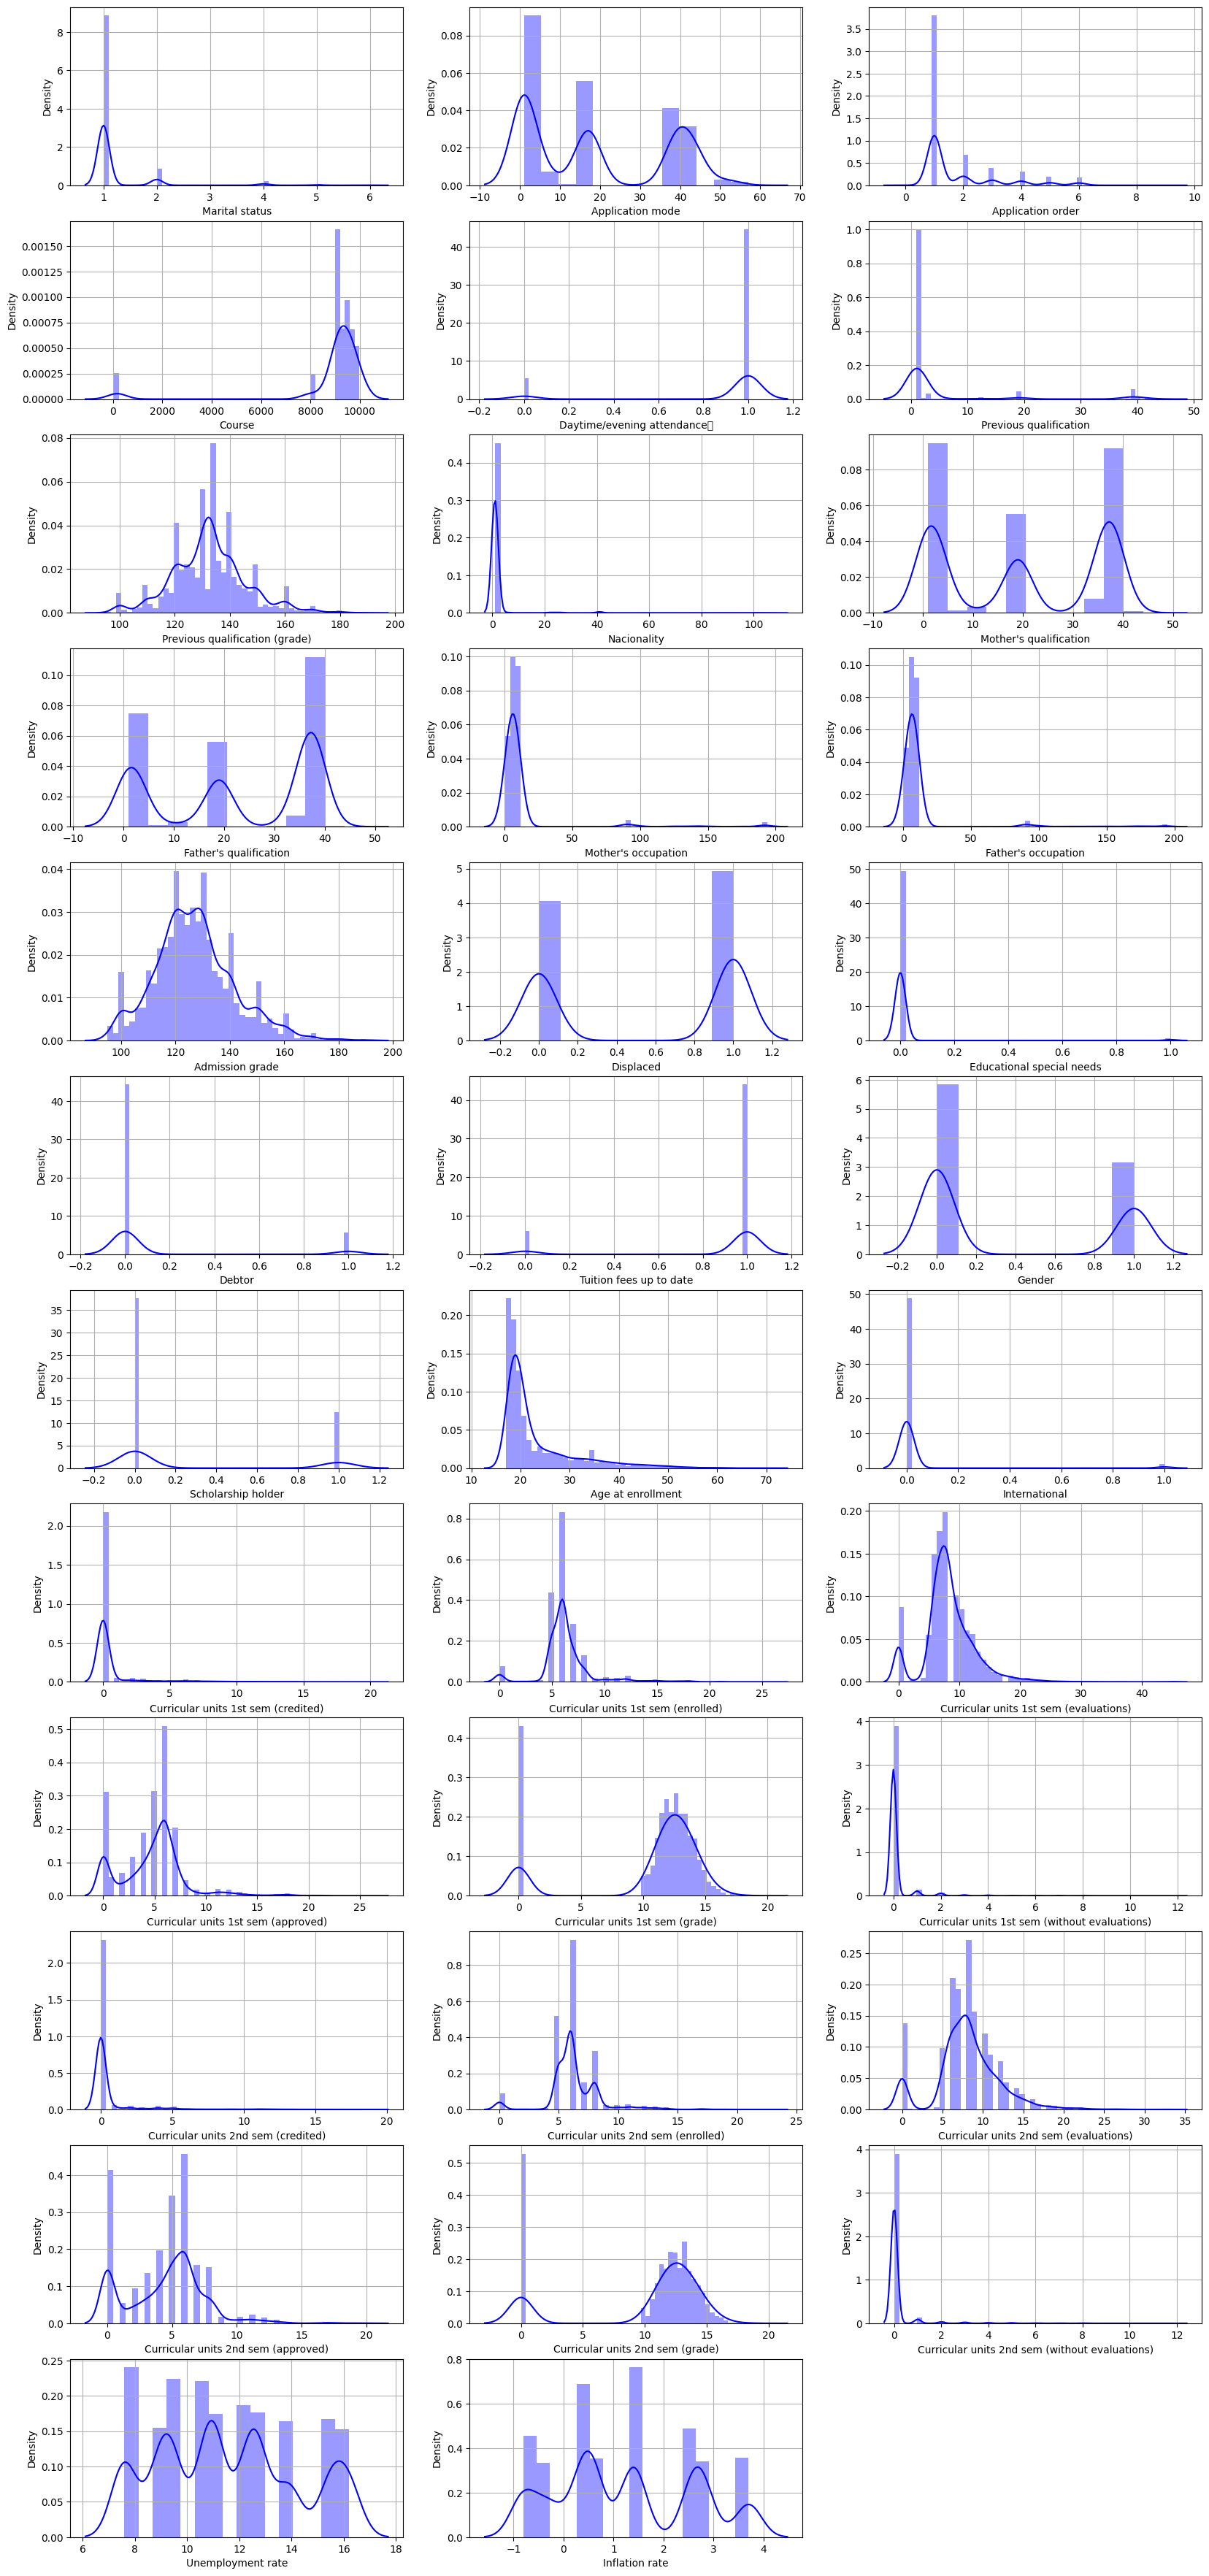

In [ ]:
plt.figure(figsize=(20, 45))

for i in range(0, 35):
    plt.subplot(12,3,i+1)
    sns.distplot(df.iloc[:, i], color='blue')
    plt.grid()

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


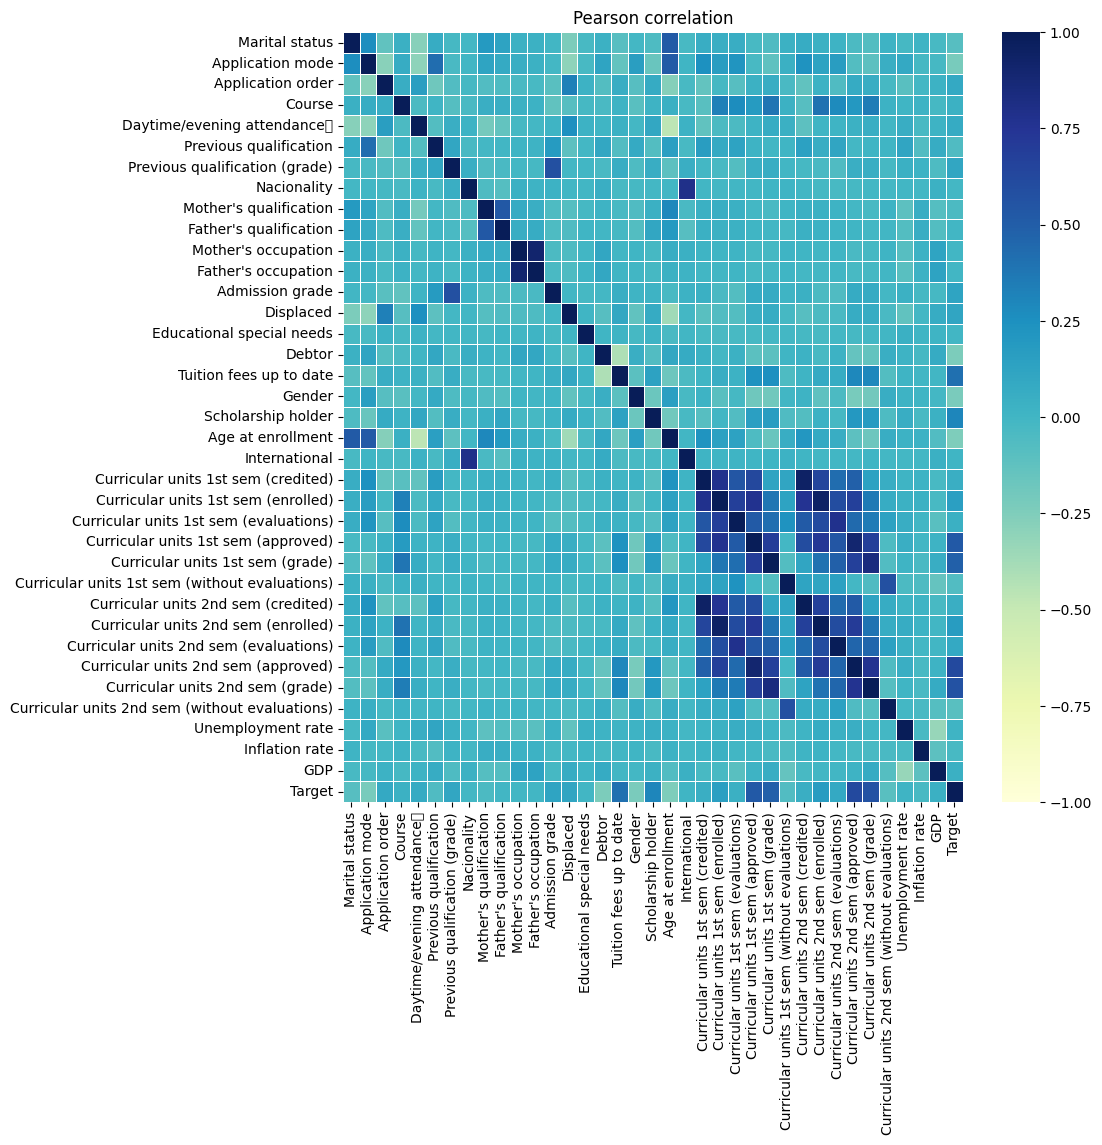

In [ ]:
#feature selection
corr_matrix = df.corr(method="pearson")
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=False, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("Pearson correlation")
plt.show()

In [ ]:
["Tuition fees up to date","Curricular units 1st sem (approved)","Curricular units 1st sem (grade)","Curricular units 2nd sem (approved)","Curricular units 2nd sem (grade)"]
corr_matrix["Target"]

,Target
Marital status,-0.089804
Application mode,-0.221747
Application order,0.089791
Course,0.034219
Daytime/evening attendance\t,0.075107
Previous qualification,-0.056039
Previous qualification (grade),0.103764
Nacionality,-0.014801
Mother's qualification,-0.043178
Father's qualification,-0.001393


## **potential error**

### "Enrolled" student is irrelevant. We only need to know whether a student graduated or droped out. thus  the "Enrolled" values  are removed and only with "Graduate" & "Dropout" values used.

In [ ]:
df.drop(df[df['Target'] == 1].index, inplace = True)
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2


In [ ]:
df['Dropout'] = df['Target'].apply(lambda x: 1 if x==0 else 0)
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Dropout
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,0,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,2,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,0,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,2,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,6,8,5,12.666667,0,15.5,2.8,-4.06,2,0
4420,1,1,2,9773,1,1,120.0,105,1,1,...,6,6,2,11.000000,0,11.1,0.6,2.02,0,1
4421,1,1,1,9500,1,1,154.0,1,37,37,...,8,9,1,13.500000,0,13.9,-0.3,0.79,0,1
4422,1,1,1,9147,1,1,180.0,1,37,37,...,5,6,5,12.000000,0,9.4,-0.8,-3.12,2,0


<ipython-input-24-f800bf5fae0e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Dropout'], color = "red")


<Axes: xlabel='Dropout', ylabel='Density'>

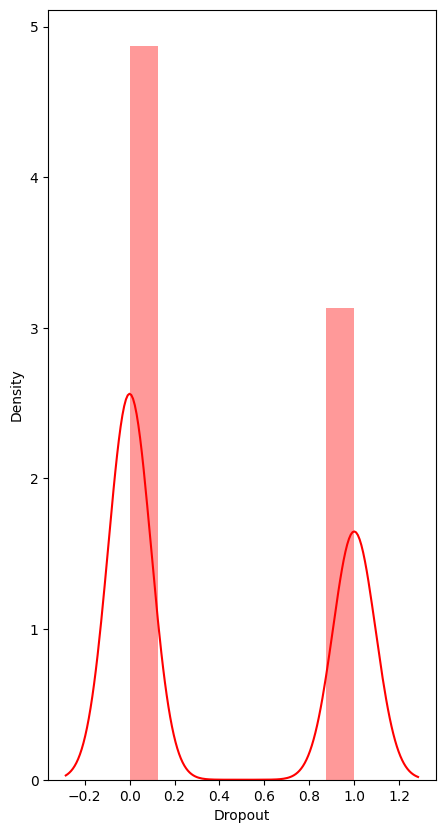

In [ ]:
plt.figure(figsize=(5, 10))
sns.distplot(df['Dropout'], color = "red")

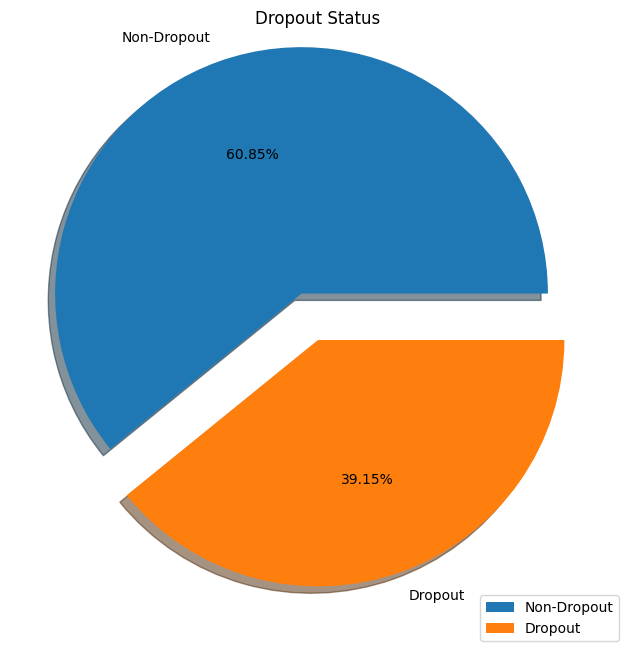

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Dropout Status")
plt.pie(df['Dropout'].value_counts(),  labels = ['Non-Dropout', 'Dropout'], explode = (0.2, 0.0), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')

# first feature selection then Standard Scaling the Data normalize numerical values(scaling all features)

In [ ]:
# ✅ INPUT FEATURES & TARGET
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# Extract X and y
x = df.iloc[:, :36].values
y = df['Dropout'].values

# FEATURE SELECTION: Keep top 10 most relevant features
selector = SelectKBest(score_func=f_classif, k=10)
x = selector.fit_transform(x, y)

# Display selected feature names
selected_columns = df.columns[:36][selector.get_support()]
print("✅ Selected Features:", selected_columns.tolist())

# STANDARDIZATION: Normalize selected features
x = StandardScaler().fit_transform(x)


✅ Selected Features: ['Application mode', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']


In [ ]:
# y = df['Dropout'].values
# y

# Train & Test Splitting the Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# Function to Measure Performance

In [ ]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred, average = 'micro'))
    print("Recall : ", recall_score(y_test, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred, average = 'micro'))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")

    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Non-Dropout', 'Dropout'])
    cm.plot()

# Gaussian Naive Bayes

In [ ]:
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred_nb = model_nb.predict(x_test)

Precision :  0.8512396694214877
Recall :  0.8512396694214877
Accuracy :  0.8512396694214877
F1 Score :  0.8512396694214877

 [[412  36]
 [ 72 206]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       448
           1       0.85      0.74      0.79       278

    accuracy                           0.85       726
   macro avg       0.85      0.83      0.84       726
weighted avg       0.85      0.85      0.85       726

******************************************************



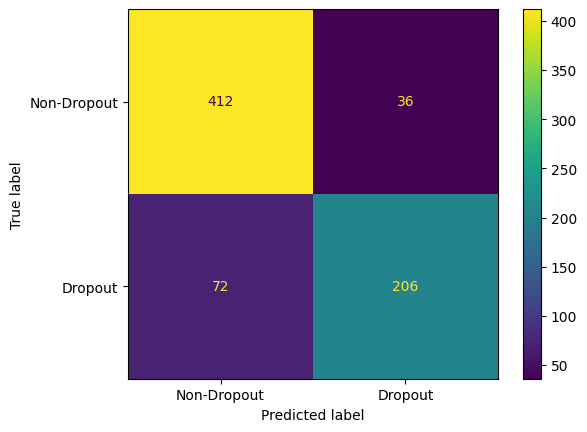

In [ ]:
perform(y_pred_nb)

# Logistic Regression

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred_lr = model_lr.predict(x_test)

Precision :  0.8939393939393939
Recall :  0.8939393939393939
Accuracy :  0.8939393939393939
F1 Score :  0.8939393939393939

 [[419  29]
 [ 48 230]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       448
           1       0.89      0.83      0.86       278

    accuracy                           0.89       726
   macro avg       0.89      0.88      0.89       726
weighted avg       0.89      0.89      0.89       726

******************************************************



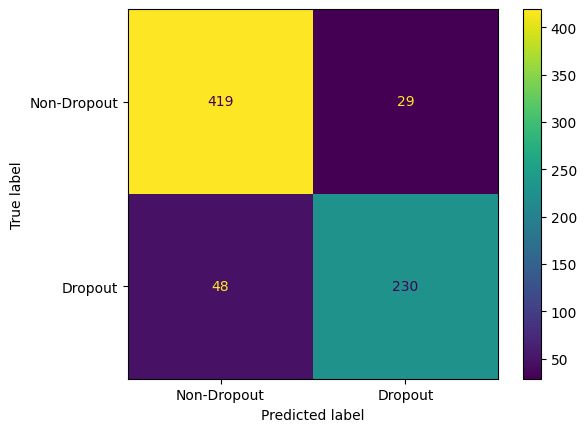

In [ ]:
perform(y_pred_lr)

# Random Forest

In [ ]:
model_rf = RandomForestClassifier(n_estimators=500,criterion='entropy')
model_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [ ]:
y_pred_rf = model_rf.predict(x_test)

Precision :  0.9104683195592287
Recall :  0.9104683195592287
Accuracy :  0.9104683195592287
F1 Score :  0.9104683195592287

 [[424  24]
 [ 41 237]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       448
           1       0.91      0.85      0.88       278

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726

******************************************************



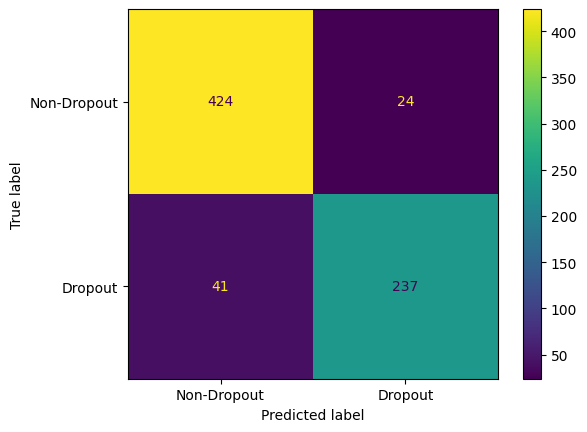

In [ ]:
perform(y_pred_rf)

# Support Vector Classifier

In [ ]:
model_svc = SVC(C=0.1,kernel='linear')
model_svc.fit(x_train, y_train)

SVC(C=0.1, kernel='linear')

In [ ]:
y_pred_svc = model_svc.predict(x_test)

Precision :  0.8980716253443526
Recall :  0.8980716253443526
Accuracy :  0.8980716253443526
F1 Score :  0.8980716253443526

 [[428  20]
 [ 54 224]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       448
           1       0.92      0.81      0.86       278

    accuracy                           0.90       726
   macro avg       0.90      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726

******************************************************



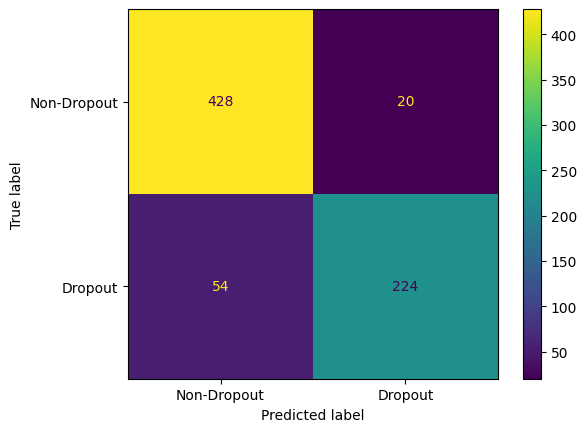

In [ ]:
perform(y_pred_svc)

# KNN Classifier

In [ ]:
error = []

# Calculating MAE error for K values between 1 and 39
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    accuracy = accuracy_score(y_test, pred_i)
    error.append(accuracy)
    # 🔍 Find the best K
best_k = error.index(max(error)) + 1
print(f" Best K value = {best_k}, Accuracy = {max(error):.4f}")


 Best K value = 9, Accuracy = 0.9036


Text(0, 0.5, 'Accuracy')

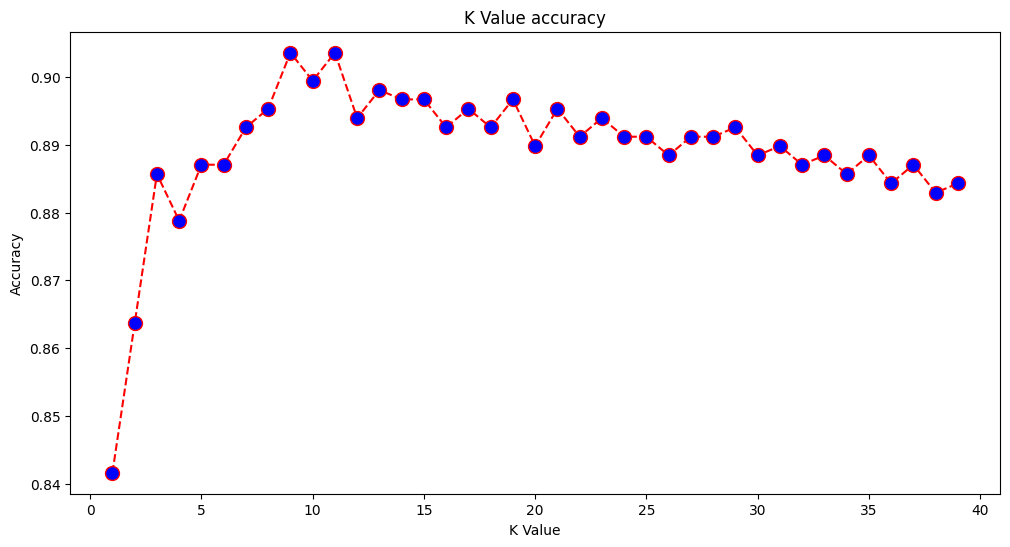

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red',
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)

plt.title('K Value accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=9)
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
y_pred_knn = model_knn.predict(x_test)

Precision :  0.9035812672176309
Recall :  0.9035812672176309
Accuracy :  0.9035812672176309
F1 Score :  0.9035812672176309

 [[430  18]
 [ 52 226]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       448
           1       0.93      0.81      0.87       278

    accuracy                           0.90       726
   macro avg       0.91      0.89      0.90       726
weighted avg       0.91      0.90      0.90       726

******************************************************



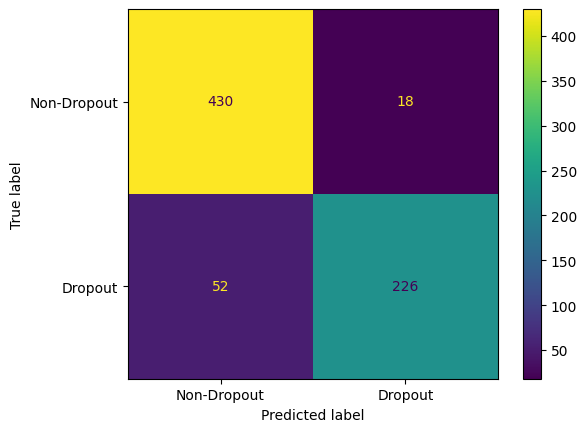

In [ ]:
perform(y_pred_knn)

# Comparison

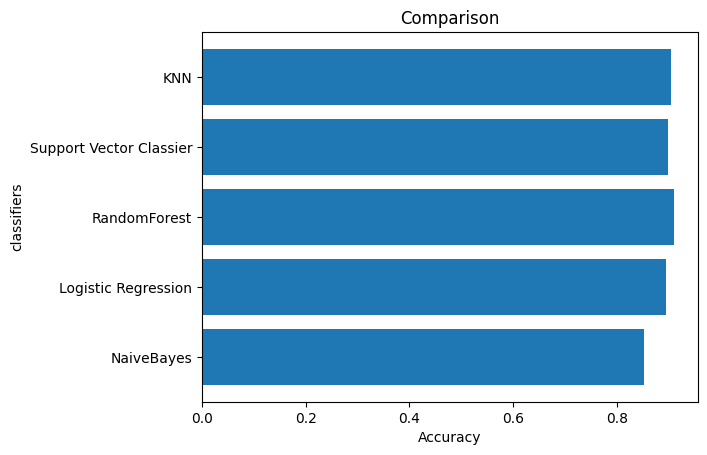

In [ ]:
pred=[y_pred_nb,y_pred_lr,y_pred_rf,y_pred_svc,y_pred_knn]
acc=[]
classifiers=["NaiveBayes","Logistic Regression","RandomForest","Support Vector Classier","KNN"]
for i in pred:
    temp=accuracy_score(y_test, i)
    acc.append(temp)

plt.barh(classifiers, acc)

# Add labels and title
plt.ylabel('classifiers')
plt.xlabel('Accuracy')
plt.title('Comparison')
plt.show()



# Comaprison tile

🔍 Model Performance Comparison:

                     Accuracy  Precision    Recall  F1 Score
Model                                                       
Naive Bayes          0.851240   0.851240  0.851240  0.851240
Logistic Regression  0.893939   0.893939  0.893939  0.893939
Random Forest        0.913223   0.913223  0.913223  0.913223
SVC                  0.899449   0.899449  0.899449  0.899449
KNN                  0.903581   0.903581  0.903581  0.903581


<Axes: title={'center': 'Model Comparison'}, xlabel='Model'>

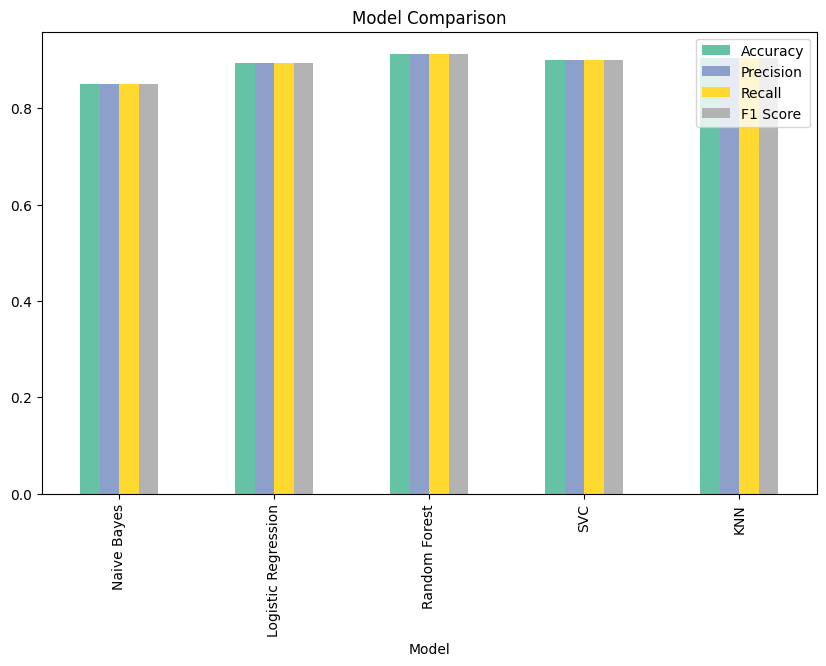

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Assuming you have already split your data into x and y
# Split the data into training and testing sets (this step must be done before model training)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Initialize the models
models = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=9)
}

# Dictionary to store predictions
model_results = {}

# Train models and generate predictions
for name, model in models.items():
    # Train the model on the training data
    model.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(x_test)

    # Store predictions in the dictionary
    model_results[name] = y_pred

# Create a comparison table to evaluate model performance
comparison = []

for name, pred in model_results.items():
    acc = accuracy_score(y_test, pred)
    prec = precision_score(y_test, pred, average='micro')
    rec = recall_score(y_test, pred, average='micro')
    f1 = f1_score(y_test, pred, average='micro')
    comparison.append([name, acc, prec, rec, f1])

# Convert to DataFrame for easier visualization
df_results = pd.DataFrame(comparison, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
df_results.set_index("Model", inplace=True)

# Display the results
print("🔍 Model Performance Comparison:\n")
print(df_results)

# Optional: Plot the results for better visualization
df_results.plot(kind='bar', figsize=(10,6), title="Model Comparison", colormap='Set2')




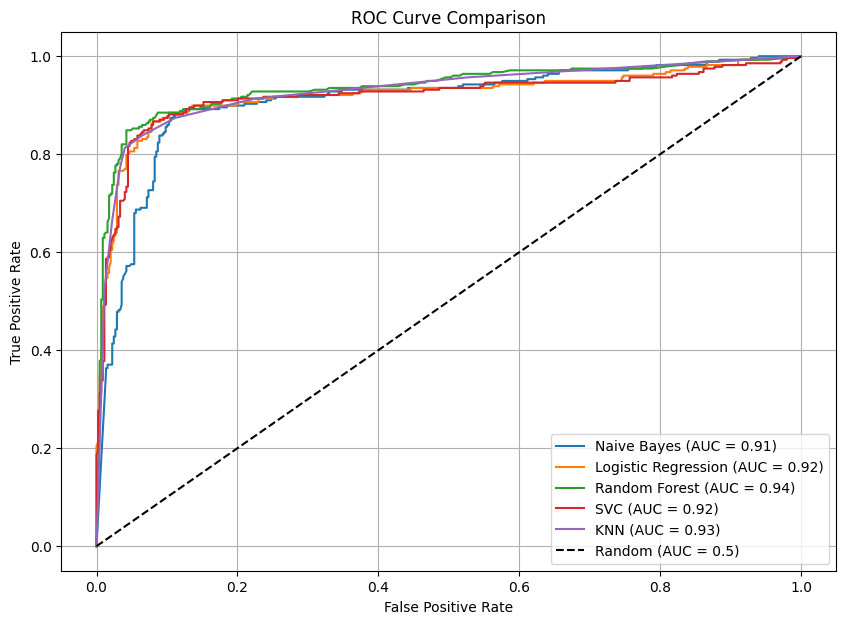

📊 Updated Model Comparison with AUC:
                     Accuracy  Precision    Recall  F1 Score       AUC
Model                                                                 
Naive Bayes          0.851240   0.851240  0.851240  0.851240  0.909124
Logistic Regression  0.893939   0.893939  0.893939  0.893939  0.920470
Random Forest        0.913223   0.913223  0.913223  0.913223  0.936697
SVC                  0.899449   0.899449  0.899449  0.899449  0.918326
KNN                  0.903581   0.903581  0.903581  0.903581  0.929864


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# For models that can output probabilities
model_probas = {
    "Naive Bayes": model_nb.predict_proba(x_test)[:,1],
    "Logistic Regression": model_lr.predict_proba(x_test)[:,1],
    "Random Forest": model_rf.predict_proba(x_test)[:,1],
    "SVC": model_svc.decision_function(x_test),  # because it's not probabilistic
    "KNN": model_knn.predict_proba(x_test)[:,1]
}

# Plot ROC curves
plt.figure(figsize=(10, 7))
for name, prob in model_probas.items():
    fpr, tpr, _ = roc_curve(y_test, prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Add AUC scores to comparison table
for name, prob in model_probas.items():
    auc_score = roc_auc_score(y_test, prob)
    df_results.loc[name, 'AUC'] = auc_score

# Show updated comparison table
print("📊 Updated Model Comparison with AUC:")
print(df_results)


# Neural Network Training Attempt

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import Adam
# from sklearn.metrics import classification_report, confusion_matrix

# # Neural Network
# model_nn = Sequential()
# model_nn.add(Dense(64, input_dim=x.shape[1], activation='relu'))
# model_nn.add(Dense(32, activation='relu'))
# model_nn.add(Dense(1, activation='sigmoid'))  # binary classification

# model_nn.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# # Train
# model_nn.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# # Predict
# y_pred_nn = model_nn.predict(x_test)
# y_pred_nn = (y_pred_nn > 0.5).astype(int)

# # Evaluate
# print(confusion_matrix(y_test, y_pred_nn))
# print(classification_report(y_test, y_pred_nn))


# grado o/p with randomforest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=500, criterion='entropy')
model_rf.fit(x_train, y_train)
# Check if RandomForest model has been fitted (trained)
if hasattr(model_rf, 'feature_importances_'):
    print("Model is trained.")
else:
    print("Model is not trained.")



Model is trained.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_test_pred = model_rf.predict(x_test)

# Evaluate performance
acc = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred)
rec = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
# Sample input for prediction (must match the selected features)
sample_input = np.array([18, 0, 1, 1, 1, 19, 4, 14, 5, 15]).reshape(1, -1)
prediction = model_rf.predict(sample_input)
print(f"Sample prediction: {prediction}")


Accuracy: 0.9132
Precision: 0.9151
Recall: 0.8525
F1 Score: 0.8827
Sample prediction: [0]


In [ ]:
# For RandomForestClassifier, check the predicted probabilities for the test data
probabilities = model_rf.predict_proba(x_test)[:, 1]
print(probabilities[:10])  # Print the first 10 predicted probabilities


[0.192    0.206    0.14     0.082    0.104    0.839178 0.09     0.534
 0.456    0.344   ]


In [ ]:
# Adjust the decision threshold for dropout prediction
threshold = 0.3  # You can try different threshold values
predictions = (probabilities >= threshold).astype(int)

# Display the adjusted predictions
print(predictions[:10])


[0 0 0 0 0 1 0 1 1 1]


In [ ]:
import gradio as gr
import numpy as np

# Define your trained model
model = model_rf  # Replace with your trained model (model_rf)

# Define the selected feature names
feature_names = [
    "Application mode", "Debtor", "Tuition fees up to date", "Gender",
    "Scholarship holder", "Age at enrollment", "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)", "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)"
]

# Prediction function that uses the trained model
def predict_dropout(application_mode, debtor, tuition_fees_up_to_date, gender, scholarship_holder,
                    age_at_enrollment, curr_units_1st_sem_approved, curr_units_1st_sem_grade,
                    curr_units_2nd_sem_approved, curr_units_2nd_sem_grade):
    # Convert inputs to a numpy array (reshaped to match model's expected input)
    input_array = np.array([[
        application_mode, debtor, tuition_fees_up_to_date, gender, scholarship_holder,
        age_at_enrollment, curr_units_1st_sem_approved, curr_units_1st_sem_grade,
        curr_units_2nd_sem_approved, curr_units_2nd_sem_grade
    ]])

    # Make the prediction
    prediction = model.predict(input_array)[0]

    # Return the result as a string (dropout or likely to graduate)
    return "⚠️ Dropout Risk" if prediction == 1 else "✅ Likely to Graduate"

# Create Gradio interface
inputs = [
    gr.Number(label="Application mode (1=Online, 2=In-person)", value=1),
    gr.Checkbox(label="Debtor (Yes=1, No=0)", value=False),
    gr.Checkbox(label="Tuition fees up to date (Yes=1, No=0)", value=True),
    gr.Checkbox(label="Gender (Male=1, Female=0)", value=False),  # Gender as checkbox (0=Female, 1=Male)
    gr.Checkbox(label="Scholarship holder (Yes=1, No=0)", value=False),
    gr.Number(label="Age at enrollment", value=20),
    gr.Number(label="Curricular units 1st semester (approved)", value=5),
    gr.Number(label="Curricular units 1st semester (grade)", value=14),
    gr.Number(label="Curricular units 2nd semester (approved)", value=4),
    gr.Number(label="Curricular units 2nd semester (grade)", value=13)
]

# Launch the Gradio interface
gr.Interface(
    fn=predict_dropout,  # The function that handles predictions
    inputs=inputs,       # The input fields for the model
    outputs=gr.Textbox(label="Prediction Result"),  # Output to show the prediction result
    title="🎓 Student Dropout Predictor",
    description="Enter student details to predict the risk of dropout based on trained data."
).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://32a4a8c39267032cde.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# import gradio as gr
# import numpy as np

# # Use your trained model here (replace with model_rf or model_nn)
# model = model_rf  # Or model_nn

# # Define input labels
# feature_names = [
#     "Marital status", "Application mode", "Application order", "Course",
#     "Daytime/evening attendance", "Previous qualification", "Previous qualification grade",
#     "Nacionality", "Mother's qualification", "Father's qualification", "Mother's occupation",
#     "Father's occupation", "Admission grade", "Displaced", "Educational special needs",
#     "Debtor", "Tuition fees up to date", "Gender", "Scholarship holder", "Age at enrollment",
#     "International", "Unemployment rate", "Inflation rate", "GDP"
# ]

# def predict_dropout(*inputs):
#     input_array = np.array(inputs).reshape(1, -1)
#     prediction = model.predict(input_array)[0]
#     return "⚠️ Dropout Risk" if prediction == 1 else "✅ Likely to Graduate"

# inputs = [gr.Number(label=label) for label in feature_names]

# gr.Interface(
#     fn=predict_dropout,
#     inputs=inputs,
#     outputs=gr.Textbox(label="Prediction Result"),
#     title="🎓 Student Dropout Predictor",
#     description="Enter student details to predict dropout risk using the trained ML model."
# ).launch()
